In [4]:
%matplotlib inline


# Presets


This notebook demonstrates how to use the `presets` package to change the
default parameters for librosa.



In [5]:
# Code source: Brian McFee
# License: ISC

We'll need numpy and matplotlib for this example



In [6]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Import the Preset class
from presets import Preset


# To use presets, we'll make a dummy import of librosa
# and the display submodule here.
import librosa as _librosa
import librosa.display as _display
# The assignment here is to circumvent python's inability
# to rename submodule imports within the package
_librosa.display = _display
import sys
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True

if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)

By default, librosa uses the following parameters across all functions:
  - `sr=22050` (sampling rate)
  - `hop_length=512` (number of samples between frames)
  - `n_fft=2048` (number of samples per frame in STFT-like analyses)

You may want to change these values to suit your application, but
doing so consistently in every function call can be somewhat cumbersome.

Presets makes it easy to do this all at once by wrapping the module
and all function calls, and overriding default arguments.



In [7]:
# First, we need to set up the preset-wrapped librosa import

librosa = Preset(_librosa)

# To change the default sampling rate, we can set the `sr` entry:
librosa['sr'] = 44100

# and similarly for hop_length and n_fft
librosa['hop_length'] = 1024
librosa['n_fft'] = 4096

# In general, when you set `librosa['X']` for any string `X`, anywhere within
# librosa where the parameter `X` occurs as a keyword-argument,
# its default value will be replaced by whatever value you provide.

Now we can load in a file and do some analysis with the new defaults



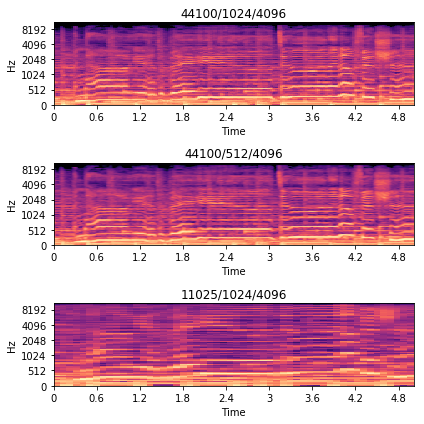

In [8]:
filename = 'audio/Karissa_Hobbs_-_09_-_Lets_Go_Fishin.mp3'

y, sr = librosa.load(filename, duration=5, offset=35)

# Generate a Mel spectrogram:

M = librosa.feature.melspectrogram(y=y)

# Of course, you can still override the new default manually, e.g.:

M_highres = librosa.feature.melspectrogram(y=y, hop_length=512)


# And plot the results
plt.figure(figsize=(6, 6))
ax = plt.subplot(3, 1, 1)

librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time')

plt.title('44100/1024/4096')

plt.subplot(3, 1, 2, sharex=ax, sharey=ax)
librosa.display.specshow(librosa.power_to_db(M_highres, ref=np.max),
                         hop_length=512,
                         y_axis='mel', x_axis='time')
plt.title('44100/512/4096')

# We can repeat the whole process with different defaults, just by
# updating the parameter entries
librosa['sr'] = 11025

y2, sr2 = librosa.load(filename, duration=5, offset=35)
M2 = librosa.feature.melspectrogram(y=y2, sr=sr2)

plt.subplot(3, 1, 3, sharex=ax, sharey=ax)
librosa.display.specshow(librosa.power_to_db(M2, ref=np.max),
                         y_axis='mel', x_axis='time')

plt.title('11025/1024/4096')

plt.tight_layout()
plt.show()